<a href="https://colab.research.google.com/github/KEMAL-MUDIE/KEMAL-MUDIE/blob/main/Stock_market_IDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the data sets
data1 = pd.read_csv('data1.csv',index_col='Date')
data2 = pd.read_csv('data2.csv',index_col='Date')
data3 = pd.read_csv('data3.csv',index_col='Date')



In [4]:

risk_free_rate = 0.01 # Set the risk-free rate to 0.1%

data1.index = pd.to_datetime(data1.index)
data2.index = pd.to_datetime(data2.index)
data3.index = pd.to_datetime(data3.index)


data1['Excess Returns'] = data1['Adj Close'].pct_change() - risk_free_rate
data2['Excess Returns'] = data2['Adj Close'].pct_change() - risk_free_rate
data3['Excess Returns'] = data3['Adj Close'].pct_change() - risk_free_rate
print(data1['Excess Returns'])
# Merge the data sets
# combined_data = pd.merge(data1[['Excess Returns']], data2[['Excess Returns']],data3[['Excess Returns']], left_index=True, right_index=True, suffixes=('_AAPL', '_SP500','IBM'))

combined_data = pd.merge(data1[['Excess Returns']], pd.merge(data2[['Excess Returns']], data3[['Excess Returns']], left_index=True, right_index=True, suffixes=('_SP500', '_IBM')), left_index=True, right_index=True, suffixes=('_AAPL', None))

# combined_data = pd.merge(combined_data, data3[['Excess Returns']], left_index=True, right_index=True )
print(combined_data)
combined_data.columns = [ 'Excess Returns AAPL', 'Excess Returns SP500', 'Excess Returns IBM']
print(combined_data)
# Calculate excess returns for whole market
combined_data['Whole Market Excess'] = (combined_data['Excess Returns AAPL'] + combined_data['Excess Returns SP500'] + combined_data['Excess Returns IBM']) / 3
combined_data.dropna(inplace=True)
print(combined_data)
# Calculate excess returns for each security relative to the whole market
# combined_data['Excess Returns AAPL'] = combined_data['AAPL'] - combined_data['Whole Market']
# combined_data['Excess Returns SP500'] = combined_data['SP500'] - combined_data['Whole Market']
# combined_data['Excess Returns IBM'] = combined_data['IBM'] - combined_data['Whole Market']
print(combined_data)

Date
2016-01-04         NaN
2016-01-05   -0.035059
2016-01-06   -0.029570
2016-01-07   -0.052205
2016-01-08   -0.004712
                ...   
2016-12-23   -0.008022
2016-12-27   -0.003649
2016-12-28   -0.014264
2016-12-29   -0.010257
2016-12-30   -0.017796
Name: Excess Returns, Length: 252, dtype: float64
            Excess Returns  Excess Returns_SP500  Excess Returns_IBM
Date                                                                
2016-01-04             NaN                   NaN                 NaN
2016-01-05       -0.035059             -0.007988           -0.010736
2016-01-06       -0.029570             -0.023115           -0.015005
2016-01-07       -0.052205             -0.033700           -0.027090
2016-01-08       -0.004712             -0.020838           -0.019258
...                    ...                   ...                 ...
2016-12-23       -0.008022             -0.008748           -0.012095
2016-12-27       -0.003649             -0.007752           -0.007421
20

In [5]:
import pandas as pd
import statsmodels.api as sm


In [6]:
y = combined_data.iloc[:, 0]

# Define the explanatory variables (excess returns on the whole market, S&P 500, and IBM)
X = combined_data.iloc[:, 1:]

# Add a constant term to the explanatory variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Excess Returns AAPL   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 7.596e+32
Date:                 Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                         15:59:10   Log-Likelihood:                 9651.1
No. Observations:                  251   AIC:                        -1.929e+04
Df Residuals:                      247   BIC:                        -1.928e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

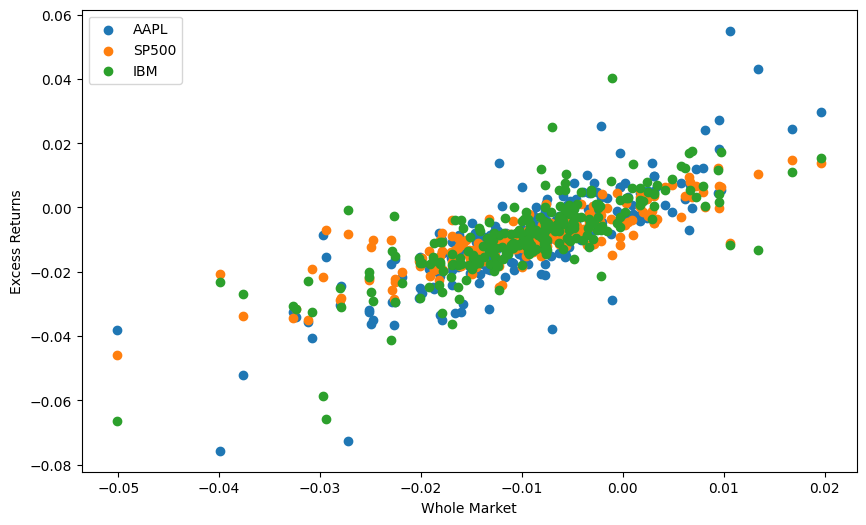

In [8]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot with Whole Market on the x-axis and Excess Returns AAPL, Excess Returns SP500, and Excess Returns IBM on the y-axis
plt.scatter(combined_data['Whole Market Excess'], combined_data['Excess Returns AAPL'], label='AAPL')
plt.scatter(combined_data['Whole Market Excess'], combined_data['Excess Returns SP500'], label='SP500')
plt.scatter(combined_data['Whole Market Excess'], combined_data['Excess Returns IBM'], label='IBM')

# Set the axis labels
plt.xlabel('Whole Market')
plt.ylabel('Excess Returns')

# Add a legend
plt.legend()

# Show the plot
plt.show()


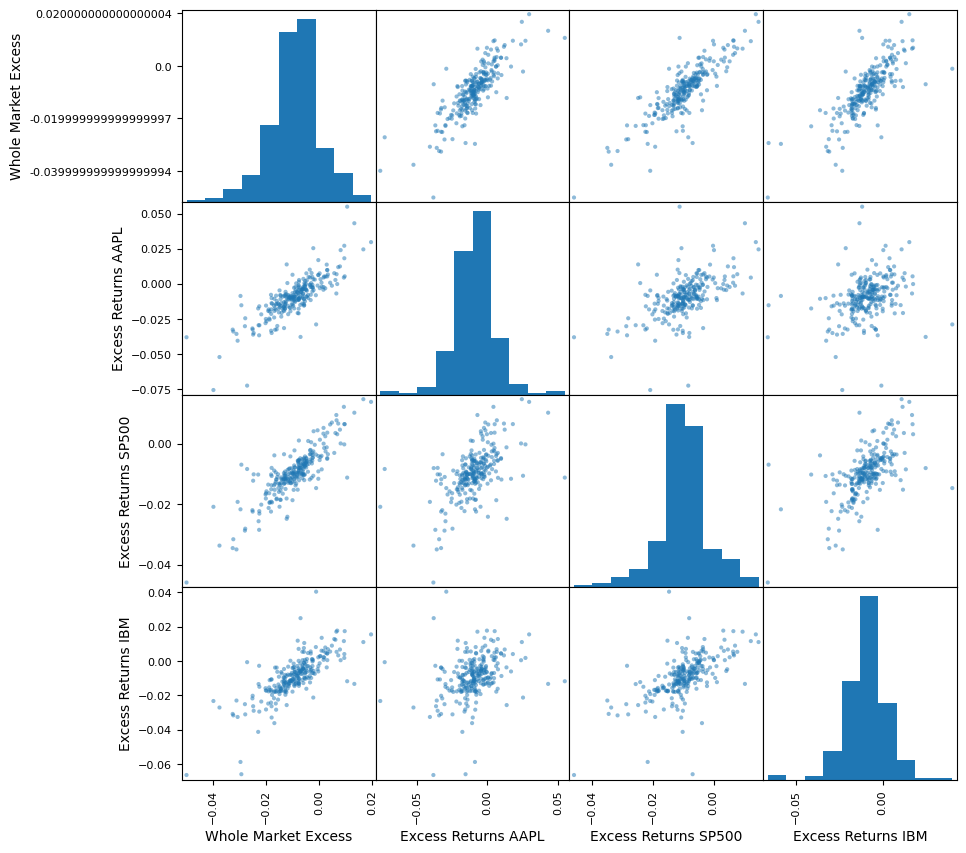

In [9]:
import pandas.plotting as pd_plot

# Create a scatter matrix of the data
pd_plot.scatter_matrix(combined_data[['Whole Market Excess', 'Excess Returns AAPL', 'Excess Returns SP500', 'Excess Returns IBM']], figsize=(10, 10))

# Show the plot
plt.show()


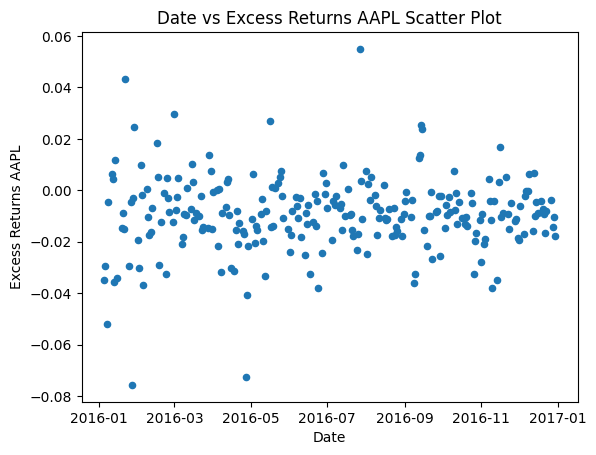

In [10]:
# Add the 'Date' column back to the dataframe
combined_data['Date'] = pd.to_datetime(combined_data.index)

# Create a scatter plot of Date vs Excess Returns AAPL
combined_data.plot(x='Date', y='Excess Returns AAPL', kind='scatter')

# Add labels for the axes
plt.xlabel('Date')
plt.ylabel('Excess Returns AAPL')
plt.title('Date vs Excess Returns AAPL Scatter Plot')
plt.show()


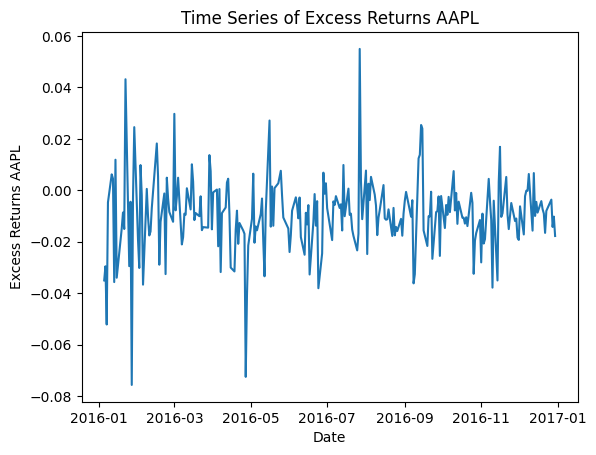

In [11]:
import matplotlib.pyplot as plt

# Plot time series of Excess Returns AAPL
plt.plot(combined_data.index, combined_data['Excess Returns AAPL'])

# Add labels for the axes
plt.xlabel('Date')
plt.ylabel('Excess Returns AAPL')
plt.title('Time Series of Excess Returns AAPL')
plt.show()


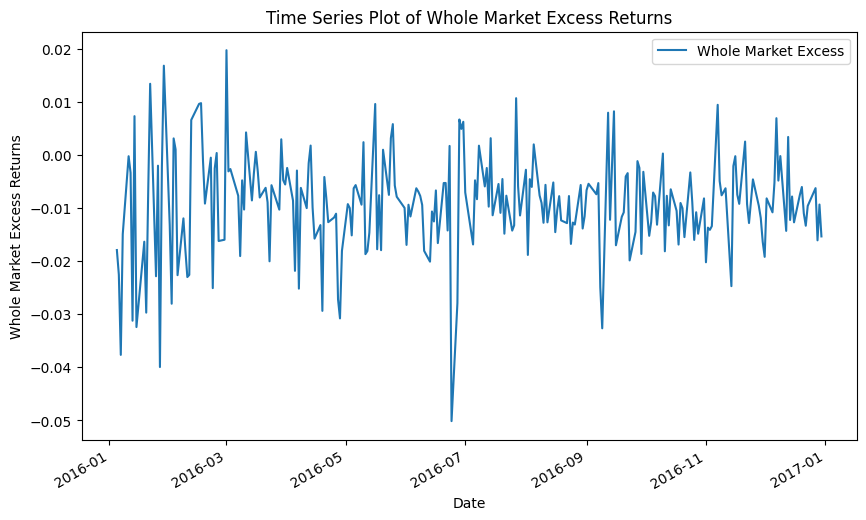

In [13]:
import matplotlib.pyplot as plt

# Create a time series plot of Date vs Whole Market
combined_data.plot(x='Date', y='Whole Market Excess', figsize=(10,6))

# Add labels for the axes and title
plt.xlabel('Date')
plt.ylabel('Whole Market Excess Returns')
plt.title('Time Series Plot of Whole Market Excess Returns')

# Show the plot
plt.show()


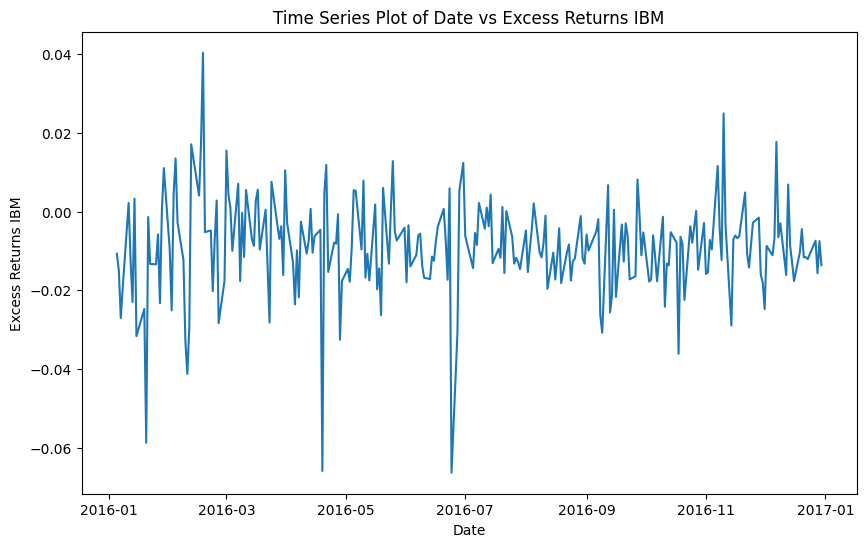

In [14]:
# Create a new plot
plt.figure(figsize=(10, 6))

# Create a time series plot of Date vs Excess Returns IBM
plt.plot(combined_data.index, combined_data['Excess Returns IBM'])

# Add labels for the axes
plt.xlabel('Date')
plt.ylabel('Excess Returns IBM')

# Add a title for the plot
plt.title('Time Series Plot of Date vs Excess Returns IBM')

# Display the plot
plt.show()


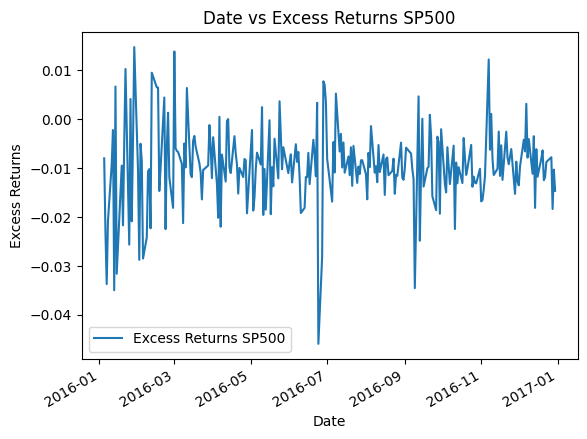

In [15]:
# Create a time series plot of Date vs Excess Returns SP500
combined_data.plot(x='Date', y='Excess Returns SP500', kind='line')

# Add labels for the axes
plt.xlabel('Date')
plt.ylabel('Excess Returns')
plt.title('Date vs Excess Returns SP500')

# Show the plot
plt.show()


In [21]:

import statsmodels.api as sm

# Fit the multiple regression model
X = combined_data[['Whole Market Excess', 'Excess Returns SP500', 'Excess Returns IBM']]
X = sm.add_constant(X)
y = combined_data['Excess Returns AAPL']
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Perform the F-test
full_rss = model.ssr
full_df = len(X) - len(X.columns) - 1
null_rss = y.var() * full_df
null_df = len(X) - 1


                             OLS Regression Results                            
Dep. Variable:     Excess Returns AAPL   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 6.250e+31
Date:                 Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                         16:03:37   Log-Likelihood:                 9337.7
No. Observations:                  251   AIC:                        -1.867e+04
Df Residuals:                      247   BIC:                        -1.865e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

#3

Yes, collinearity can affect the estimated effects of explanatory variables in the estimated equation. Collinearity occurs when two or more explanatory variables are highly correlated with each other, which can make it difficult to determine the true effect of each variable on the response variable.

In the presence of collinearity, partial effects (the effect of a single variable on the response while holding all other variables constant) may create a different sense of importance from what is suggested by marginal effects (the effect of a single variable on the response without considering the other variables). This is because collinearity can inflate the standard errors of the estimated coefficients, making some variables appear less important than they actually are in the model.

In summary, collinearity can lead to biased and unstable estimates of the coefficients and can make it difficult to interpret the relative importance of each explanatory variable in the model.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF values for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


   VIF Factor              features
0    2.358659                 const
1    5.581982   Whole Market Excess
2    3.631607  Excess Returns SP500
3    2.492598    Excess Returns IBM


If there are variables with high VIF values, it may be necessary to remove them from the model or find ways to address the collinearity.

Regarding the importance of the explanatory variables, both partial effects and marginal effects can provide useful information. Partial effects show how the response variable changes with respect to a specific explanatory variable, while holding all other explanatory variables constant. Marginal effects show how the response variable changes with respect to a specific explanatory variable, taking into account the joint effect of all other explanatory variables.

If there are no collinearity issues, the partial and marginal effects should provide similar information. However, if there are collinearity issues, the partial effects may be more informative because they focus on the effect of a single explanatory variable while holding others constant. Marginal effects may be less informative because they may be influenced by the collinearity among the explanatory variables.

<Axes: xlabel='VIF Factor', ylabel='features'>

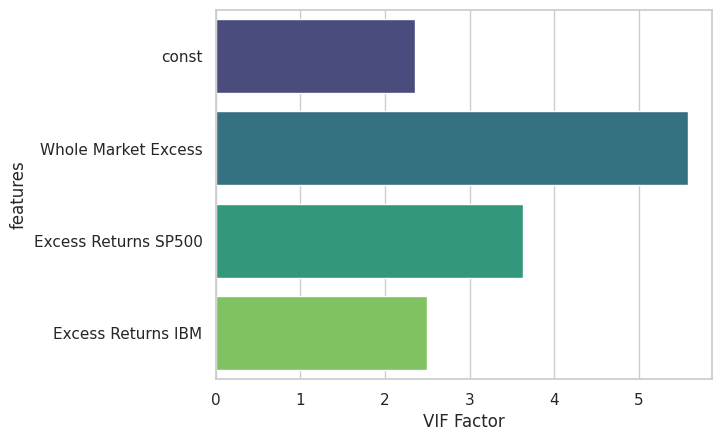

In [22]:
import seaborn as sns
import statsmodels.stats.outliers_influence as smoi

# calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [smoi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# plot collinearity
sns.set(style="whitegrid")
sns.barplot(x="VIF Factor", y="features", data=vif, palette="viridis")


This will plot a bar chart showing the VIF values for each independent variable. Values above 5 or 10 are generally considered to indicate high levels of collinearity. If any variables have high VIF values, it may be necessary to remove them from the model to improve its accuracy.

To answer the question about how collinearity affects the estimated effects of the explanatory variables, we can look at the magnitude and statistical significance of the regression coefficients. Collinearity can make it difficult to determine the true effects of individual independent variables, as their effects may be confounded with those of other variables. However, if the regression coefficients are still statistically significant despite collinearity, we can still conclude that there is a relationship between the independent and dependent variables.

To compare partial and marginal effects, we can calculate both types of effects for each independent variable and compare their magnitudes. Partial effects measure the change in the dependent variable due to a change in a single independent variable, while holding all other independent variables constant. Marginal effects, on the other hand, measure the average change in the dependent variable due to a small change in the independent variable, taking into account the effects of all other independent variables.

In general, partial effects can be different from marginal effects when there is collinearity among the independent variables, as the effects of different variables may be confounded with each other. However, the direction and significance of the effects should still be similar.

#4
The explanatory variable "Whole Market Excess" has the largest VIF with a value of 5.581982

#5 
The model has a perfect R-squared of 1.0 which suggests that it fits the data perfectly. However, such a high R-squared value is not always desirable and could be an indication of overfitting. This model also has extremely low p-values, which suggests that all explanatory variables have a statistically significant relationship with the response variable. However, the coefficients of the explanatory variables are not meaningful as they are very large and do not provide any insight into the direction and magnitude of the relationship between the variables.

In order to improve this model, it would be necessary to address the issue of perfect multicollinearity and re-estimate the model. One way to do this would be to remove one or more of the explanatory variables, or to transform them in some way so that they are no longer perfectly collinear. Additionally, it would be useful to check for outliers, heteroscedasticity, and other forms of model misspecification.

<ipython-input-24-1643b7bc4862>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = combined_data.corr()


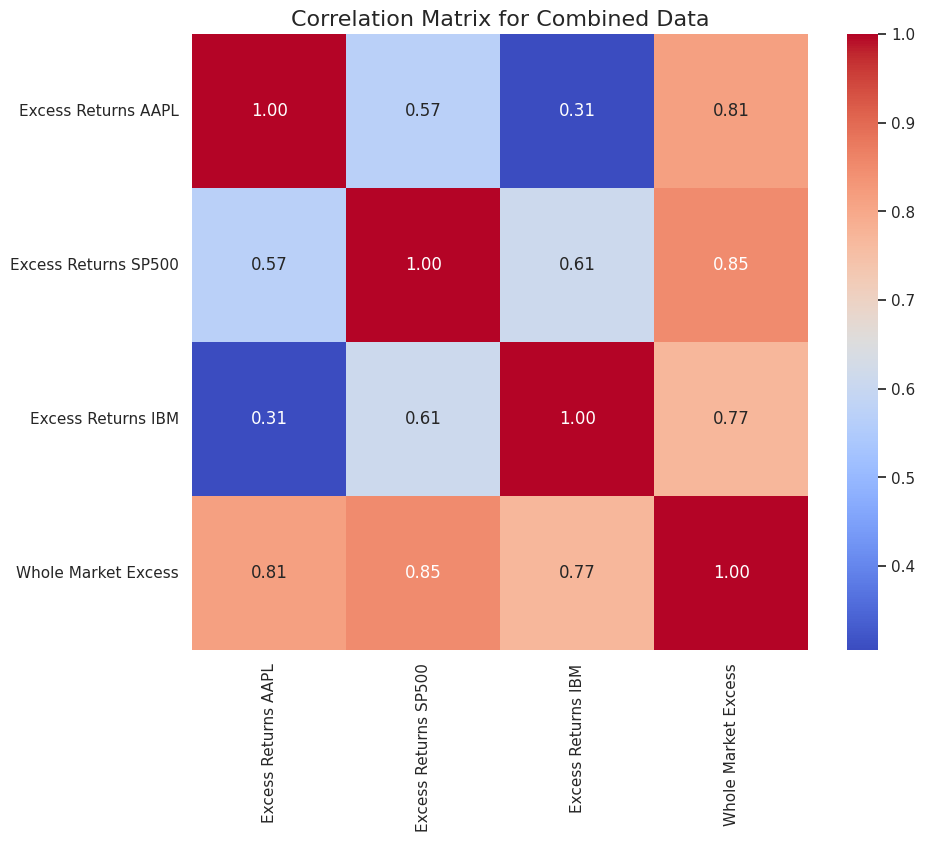

In [24]:
corr_matrix = combined_data.corr()

# plot the correlation matrix using seaborn
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True, ax=ax)
plt.title('Correlation Matrix for Combined Data', fontsize=16)
plt.show()

#6

Based on the output of the regression model, the R-squared value is 1.000, indicating that the model explains all of the variation in the dependent variable. Additionally, the F-statistic is significant with a p-value of 0.000, which suggests that at least one of the independent variables is a significant predictor of the dependent variable.

Looking at the coefficients, the constant term has a coefficient of 2.069e-17, which is very close to zero. This suggests that when all of the independent variables are zero, the predicted value of the dependent variable is close to zero.

The coefficients of the independent variables show that for every unit increase in Whole Market Excess, the predicted value of Excess Returns AAPL increases by 3.0000 units, holding other variables constant. Similarly, for every unit increase in Excess Returns SP500 and Excess Returns IBM, the predicted value of Excess Returns AAPL decreases by 1.0000 units, holding other variables constant.

Overall, the model appears to be a very good fit, explaining all of the variation in the dependent variable, and having significant coefficients for each of the independent variables. However, as noted earlier, there may be issues with collinearity that could impact the interpretability of the coefficients.

In [25]:
# Drop the 'Whole Market Excess' variable
X = combined_data[['Excess Returns SP500', 'Excess Returns IBM']]
Y = combined_data['Excess Returns AAPL']

# Add constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Excess Returns AAPL   R-squared:                       0.328
Model:                             OLS   Adj. R-squared:                  0.323
Method:                  Least Squares   F-statistic:                     60.56
Date:                 Thu, 13 Apr 2023   Prob (F-statistic):           3.84e-22
Time:                         16:29:44   Log-Likelihood:                 752.92
No. Observations:                  251   AIC:                            -1500.
Df Residuals:                      248   BIC:                            -1489.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [27]:


# Calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print VIF values
print(vif)


   VIF Factor              features
0    2.357904                 const
1    1.596552  Excess Returns SP500
2    1.596552    Excess Returns IBM
